In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
import random
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
cd

/Users/ijyapaudel


In [3]:
import os 
os.getcwd()

'/Users/ijyapaudel'

In [4]:
cd Desktop

/Users/ijyapaudel/Desktop


In [5]:
cd Thinkful

/Users/ijyapaudel/Desktop/Thinkful


In [6]:
ls

Bayes/               PCA/                 Stat/
Capstone/            Plotting /           T-Testing/
Capstone Project/    Python Fundamentals/ Untitled.pages
Cleaning Data/       SQL/


In [7]:
cd Capstone

/Users/ijyapaudel/Desktop/Thinkful/Capstone


# Using machine learning to predict student drop out rates:

This project aims to predict student drop out rates based on data provided by College Scoreboard (https://collegescorecard.ed.gov). The aim is to predict student drop outs rates that can be used by both students and colleges. The project aims to address issues faced by two different stakeholders: colleges vs. students. 

### Stakeholder # 1: Colleges

Our main stakeholders are colleges / universities. Student drop-out rate is a concern for colleges as it results in decreased revenue as well as causes reputational problems. It may also showcase opportunities of improvement in parts of colleges such as provided better resources and guidances for students that may benefit from it. 

### Stakeholer # 2: Students

Our second stakeholders are students who can use this data to see what schools / colleges have the lowest predicted drop-out rates in the future. They can use this to make decisions regarding their decision to attend a particular college vs. other. It might also be a tool for students to hedge their risks. 

### Data:

The data will look at various datasets from College Scoreboard. Each dataset is divided by years from 2007 - 2017. The dataset is quite extensive and when combined from 2010 - 2017, there are over 1,977 features and over 50,000 rows. To reduce complexity of the project and ensure we're addressing each stakeholder differently, I have decided to do analysis in two parts. 

### First Approach in Analysis for Colleges as Stakeholders:

As my initial stakeholders are colleges - I have decided to look at various factors that impact student dropout here acknowledging that colleges would be more interested in predicting what causes drop outs versus the actual rates of drop outs. Here, what is important is the features causing high drop out rates.

To do this, I have chosen to look at two different datasets. The target (drop out rate) will come from dataset 2016's Year 2 Drop-Out Columns (WDRAW_ORIG_YR2_RT) and the features will come from the year 2014-2015 dataset. This division is done as the Year 2 Drop Out Column in 2016 is referring to drop out rates from the cohort of 2014 - 2015. 

I will set the Drop-Out Rate as a target and use features from year 2014 - 2015 to see what is influencing drop out rates through evaluating Feature Importance. I will also run this model through supervised / unsupervised learning models to predict drop out rates. 

# Import all datasets: 

- Imported data from 2006 - 2017. 
- Confirmed all datasets had same column names

In [8]:
df_2006 = pd.read_csv('2005-2006.csv')

In [9]:
df_2007 = pd.read_csv('2006-2007.csv')
df_2008 = pd.read_csv('2007-2008.csv')
df_2009 = pd.read_csv('2008-2009.csv')
df_2010 = pd.read_csv('2009-2010.csv') #Academic year 9 - 10
df_2011 = pd.read_csv('2010-2011.csv') #Academic year 10 - 11
df_2012 = pd.read_csv('2012-2013.csv') #Academic year 12 - 13
df_2013 = pd.read_csv('2013-2014.csv') #Academic year 13 - 14
df_2014 = pd.read_csv('2014-2015.csv') #Academic year 14 - 15
df_2015 = pd.read_csv('2015-2016.csv') #Academic year 15 - 16 
df_2016 = pd.read_csv('2016-2017.csv') #Academic year 16 - 17
df_2017 = pd.read_csv('2017-2018.csv') #Academic year 17 - 18

# College Stakeholder Analysis:

For this, I picked the dataset 2014's Year 2 withdraw rate as target data and used features from 2012 dataset. The reasoning is the Year 2 data on 2014 dataset refers to cohort of 2012 - 2013. Therefore, to understand the drop out rates reported in 2014, we have to evaluate features from the 2012 - 2013 dataset. 

To do this, I extracted the target variable from the 2014 dataset and added it to the 2012 dataset with the exisiting features. I then removed unnecessary features and created a new dataset title "df_college" in which I will run my analysis.

In [10]:
df_2012.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_2014.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning:

The initial dataset is really large. There are over 1,977 features in the dataset so, it was important to make sure that the data was properly prepared for analysis.

The first step was to set index to "UNITID", this way - we can be sure that data matches up to correct colleges for both datasets. 

I also removed all missing values and replaced them with 0's. A lot of columns also had confidential information and were listed as "PrivacySuppressed" so,  I also replaced "PrivacySuppressed" with 0's. 

Most of the data types for the dataset were floats so, I also converted data types to floats to prepare for modelling. 

In [12]:
df_2014 = df_2014.set_index('UNITID')

In [13]:
df_2012 = df_2012.set_index('UNITID')

In [14]:
df_2012 = df_2012.join(df_2014['WDRAW_ORIG_YR2_RT'], rsuffix = 'New')

In [15]:
df_2012['WDRAW_ORIG_YR2_RTNew'] = df_2012['WDRAW_ORIG_YR2_RTNew'].fillna(0)
df_2012['WDRAW_ORIG_YR2_RTNew'] = df_2012['WDRAW_ORIG_YR2_RTNew'].replace(['PrivacySuppressed'], [0])
df_2012['WDRAW_ORIG_YR2_RTNew'] = df_2012['WDRAW_ORIG_YR2_RTNew'].astype(float)
df_2012['WDRAW_ORIG_YR2_RT'] = df_2012['WDRAW_ORIG_YR2_RT'].fillna(0)
df_2012['WDRAW_ORIG_YR2_RT'] = df_2012['WDRAW_ORIG_YR2_RT'].replace(['PrivacySuppressed'], [0])
df_2012['WDRAW_ORIG_YR2_RT'] = df_2012['WDRAW_ORIG_YR2_RT'].astype(float)
df_2012['WDRAW_ORIG_YR4_RT'] = df_2012['WDRAW_ORIG_YR4_RT'].fillna(0)
df_2012['WDRAW_ORIG_YR4_RT'] = df_2012['WDRAW_ORIG_YR4_RT'].replace(['PrivacySuppressed'], [0])
df_2012['WDRAW_ORIG_YR4_RT'] = df_2012['WDRAW_ORIG_YR4_RT'].astype(float)

target_data = df_2012['WDRAW_ORIG_YR2_RTNew']


In [16]:
df_2012['WDRAW_ORIG_YR2_RTNew'].dtypes

dtype('float64')

In [17]:
df_2012['WDRAW_ORIG_YR2_RT'].dtypes

dtype('float64')

In [18]:
x = df_2012['WDRAW_ORIG_YR2_RT']
y = df_2012['WDRAW_ORIG_YR2_RTNew']
#x = x.fillna(0)
#y = y.fillna(0)
#x = x.replace(['PrivacySuppressed'], [0])
#y = y.replace(['PrivacySuppressed'], [0])
#x = x.astype(float)
#y = y.astype(float)

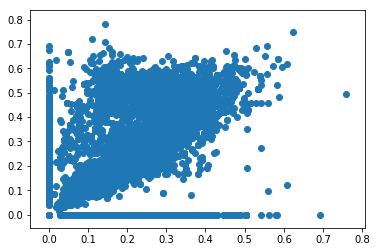

In [19]:
plt.scatter(x,y)

In [20]:
df_2012.shape

(7793, 1977)

In [21]:
df_2012['WDRAW_ORIG_YR2_RT'].head()

UNITID
100654    0.248126
100663    0.207568
100690    0.416185
100706    0.190311
100724    0.322058
Name: WDRAW_ORIG_YR2_RT, dtype: float64

In [22]:
target_data.head()

UNITID
100654    0.318109
100663    0.259811
100690    0.633188
100706    0.215600
100724    0.305031
Name: WDRAW_ORIG_YR2_RTNew, dtype: float64

# Feature selection:

Feature selection was fairly difficult for this project due to the number of features there were in the initial dataset (1,977). The features were also very different ranging from text data, numerical data, financial data, and others. 

PCA Analysis did not show helpful results so, I ended up picking out features that I thought would impact the drop out rate. Most of them are intuitive (such as tuition of a college being possibly linked to drop out rate). But, if my models were underperforming - I edited/ changed my features accordingly to see if they would perform better. 

In [23]:
features = ['UNEMP_RATE', 'MTHCMP1', 'CUML_DEBT_N', 'LO_INC_DEBT_N', 'COSTT4_A', 'COSTT4_P', 'PCTPELL','LATITUDE', 'LONGITUDE', 'ADM_RATE', 'SAT_AVG', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PAR_ED_PCT_1STGEN', 'WDRAW_DEBT_MDN', 'LO_INC_DEBT_MDN', 'MD_INC_DEBT_MDN', 'HI_INC_DEBT_MDN','AGE_ENTRY','FIRST_GEN', 'FAMINC', 'PCT_WHITE', 'PCT_BLACK', 'PCT_ASIAN', 'PCT_HISPANIC', 'WDRAW_ORIG_YR2_RT', 'POVERTY_RATE', 'AGE_ENTRY_SQ', 'FEMALE', 'MARRIED', 'VETERAN', 'FIRST_GEN', 'PELL_EVER', 'LOAN_EVER', 'ADM_RATE', 'SAT_AVG', 'SAT_AVG_ALL', 'UGDS', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'AVGFACSAL', 'PFTFTUG1_EF', 'WDRAW_ORIG_YR3_RT', 'WDRAW_ORIG_YR4_RT','WDRAW_ORIG_YR2_RTNew']

In [24]:
df_college = df_2012[features]

In [25]:
df_college.head()

,UNEMP_RATE,MTHCMP1,CUML_DEBT_N,LO_INC_DEBT_N,COSTT4_A,COSTT4_P,PCTPELL,LATITUDE,LONGITUDE,ADM_RATE,...,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,AVGFACSAL,PFTFTUG1_EF,WDRAW_ORIG_YR3_RT,WDRAW_ORIG_YR4_RT,WDRAW_ORIG_YR2_RTNew
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,NaN,NaN,3005,1884,17351.0,NaN,0.7011,NaN,NaN,0.5438,...,4081.0,0.0260,0.9552,0.0037,0.0007,6678.0,0.862931,0.22513922,0.227888,0.318109
100663,NaN,NaN,5948,2828,20441.0,NaN,0.3680,NaN,NaN,0.7223,...,11014.0,0.5937,0.2654,0.0246,0.0474,9650.0,0.563543,0.201495638,0.185837,0.259811
100690,NaN,NaN,524,376,11420.0,NaN,0.8688,NaN,NaN,NaN,...,338.0,0.2633,0.3698,0.0089,0.0118,3635.0,0.692308,0.502994012,0.384106,0.633188
100706,NaN,NaN,2638,1227,19687.0,NaN,0.3345,NaN,NaN,0.7766,...,5703.0,0.7019,0.1408,0.0344,0.0330,8923.0,0.474537,0.189720333,0.148833,0.215600
100724,NaN,NaN,3771,2630,17533.0,NaN,0.7752,NaN,NaN,0.4604,...,5123.0,0.0121,0.9492,0.0102,0.0006,6408.0,0.857826,0.283642691,0.256149,0.305031


In [26]:
df_college = df_college.fillna(0)

In [27]:
df_college = df_college.replace(['PrivacySuppressed'], [0])

In [28]:
df_college[['PAR_ED_PCT_1STGEN', 'WDRAW_DEBT_MDN', 'LO_INC_DEBT_MDN']] = df_college[['PAR_ED_PCT_1STGEN', 'WDRAW_DEBT_MDN', 'LO_INC_DEBT_MDN']].apply(pd.to_numeric)
df_college[['WDRAW_ORIG_YR2_RT']] = df_college[['WDRAW_ORIG_YR2_RT']].apply(pd.to_numeric)

In [29]:
df_college.dtypes

UNEMP_RATE              float64
MTHCMP1                 float64
CUML_DEBT_N              object
LO_INC_DEBT_N            object
COSTT4_A                float64
COSTT4_P                float64
PCTPELL                 float64
LATITUDE                float64
LONGITUDE               float64
ADM_RATE                float64
SAT_AVG                 float64
TUITIONFEE_IN           float64
TUITIONFEE_OUT          float64
PAR_ED_PCT_1STGEN       float64
WDRAW_DEBT_MDN          float64
LO_INC_DEBT_MDN         float64
MD_INC_DEBT_MDN          object
HI_INC_DEBT_MDN          object
AGE_ENTRY                object
FIRST_GEN                object
FAMINC                   object
PCT_WHITE               float64
PCT_BLACK               float64
PCT_ASIAN               float64
PCT_HISPANIC            float64
WDRAW_ORIG_YR2_RT       float64
POVERTY_RATE            float64
AGE_ENTRY_SQ            float64
FEMALE                   object
MARRIED                  object
VETERAN                  object
FIRST_GE

# Data Cleaning 2: 

I converted columns from my features to be numeric / as floats. The code could be more efficient but, I was running into errors when I grouped these so, I did it manually to avoid errors in the process. 

In [30]:
df_college['CUML_DEBT_N'] = df_college['CUML_DEBT_N'].astype(float)
df_college['LO_INC_DEBT_N'] = df_college['LO_INC_DEBT_N'].astype(float)
df_college['MD_INC_DEBT_MDN'] = df_college['MD_INC_DEBT_MDN'].apply(pd.to_numeric)
df_college['HI_INC_DEBT_MDN'] = df_college['HI_INC_DEBT_MDN'].apply(pd.to_numeric)
df_college['AGE_ENTRY'] = df_college['AGE_ENTRY'].apply(pd.to_numeric)
df_college['FAMINC'] = df_college['FAMINC'].apply(pd.to_numeric)
df_college['FEMALE'] = df_college['FEMALE'].apply(pd.to_numeric)
df_college['MARRIED'] = df_college['MARRIED'].apply(pd.to_numeric)
df_college['VETERAN'] = df_college['VETERAN'].apply(pd.to_numeric)
df_college['PELL_EVER'] = df_college['PELL_EVER'].apply(pd.to_numeric)
df_college['LOAN_EVER'] = df_college['LOAN_EVER'].apply(pd.to_numeric)
df_college['CUML_DEBT_N'] = df_college['CUML_DEBT_N'].apply(pd.to_numeric)
df_college['LO_INC_DEBT_N'] = df_college['LO_INC_DEBT_N'].apply(pd.to_numeric)
df_college['FIRST_GEN'] = df_college['FIRST_GEN'].apply(pd.to_numeric)
df_college['WDRAW_ORIG_YR3_RT'] = df_college['WDRAW_ORIG_YR3_RT'].apply(pd.to_numeric)
df_college['WDRAW_ORIG_YR4_RT'] = df_college['WDRAW_ORIG_YR4_RT'].apply(pd.to_numeric)

In [31]:
df_college['TUITION_AVG'] = (df_college['TUITIONFEE_IN'] + df_college['TUITIONFEE_OUT'])/2

In [32]:
df_college.head()

,UNEMP_RATE,MTHCMP1,CUML_DEBT_N,LO_INC_DEBT_N,COSTT4_A,COSTT4_P,PCTPELL,LATITUDE,LONGITUDE,ADM_RATE,...,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,AVGFACSAL,PFTFTUG1_EF,WDRAW_ORIG_YR3_RT,WDRAW_ORIG_YR4_RT,WDRAW_ORIG_YR2_RTNew,TUITION_AVG
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,0.0,0.0,3005.0,1884.0,17351.0,0.0,0.7011,0.0,0.0,0.5438,...,0.0260,0.9552,0.0037,0.0007,6678.0,0.862931,0.225139,0.227888,0.318109,9978.0
100663,0.0,0.0,5948.0,2828.0,20441.0,0.0,0.3680,0.0,0.0,0.7223,...,0.5937,0.2654,0.0246,0.0474,9650.0,0.563543,0.201496,0.185837,0.259811,11130.0
100690,0.0,0.0,524.0,376.0,11420.0,0.0,0.8688,0.0,0.0,0.0000,...,0.2633,0.3698,0.0089,0.0118,3635.0,0.692308,0.502994,0.384106,0.633188,6800.0
100706,0.0,0.0,2638.0,1227.0,19687.0,0.0,0.3345,0.0,0.0,0.7766,...,0.7019,0.1408,0.0344,0.0330,8923.0,0.474537,0.189720,0.148833,0.215600,14951.0
100724,0.0,0.0,3771.0,2630.0,17533.0,0.0,0.7752,0.0,0.0,0.4604,...,0.0121,0.9492,0.0102,0.0006,6408.0,0.857826,0.283643,0.256149,0.305031,11088.0


In [33]:
#Running on entire sample instead of just 20% of the dataset

#df_college = df_college.sample(frac = 0.20)

In [34]:
df_college.shape

(7793, 48)

In [35]:
df_2012.head()

,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,...,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP,WDRAW_ORIG_YR2_RTNew
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.318109
100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259811
100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.633188
100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215600
100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.305031


##  PCA Attempt: Getting an error - ask mentor re Error (I am getting this TypeError: cannot perform reduce with flexible type) 

In [36]:
# x = df_college.loc[:, features].values
# y = df_college.iloc[:, ['WDRAW_ORIG_YR2_RT']].values

# Data Visualization: 

Here, I tried to create a few visualization to see if my initial intuition would be correct. For example, I thought that the tuition average would possibly be correlated to withdraw rate. 

The first image shows that there is a correlation between Tuition Average and Withdraw Rate and that as Tuition goes up so does the Withdraw rate of the students. 

This can show universities/ colleges that there is a correlation between drop out rates / increase in tuition. This can also encourage them to provide more financial aide / support to students if they aim to decrease withdraw rates. 

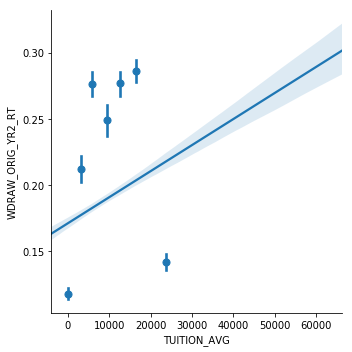

In [37]:
sns.lmplot(x = 'TUITION_AVG', y = 'WDRAW_ORIG_YR2_RT', data = df_college, fit_reg = True, x_bins = 10)
plt.show()

### Relationship between Tuition / Median Debt of Students that Withdrew:

This second visualization here shows the positive correlation between high tuition / debt of students that withdrew from colleges. You can see that as tuition increases so, does the debt.  



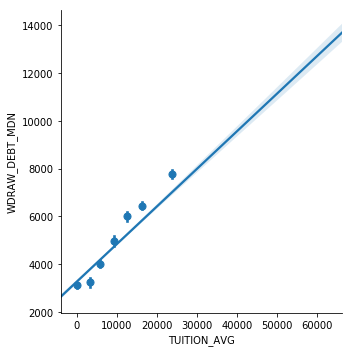

In [38]:
sns.lmplot(x = 'TUITION_AVG', y = 'WDRAW_DEBT_MDN', data = df_college, fit_reg = True, x_bins = 10)
plt.show()

# Modelling processes and choices:

This first stakeholder analysis requires supervised learning models. As our target variable is not a category and rather is a variety of different drop out rates, we will need to use models that can work with a regression problem. 

The first step to solving a supervised learning problem is to split your data into training / testing data. Here, I used the default sklearn model of Train Test Split. I did an 80% to 20% split between the training and the testing data. 

## Train Test Split: 

Here I am doing a test train split of the data. Allocating 20% of the data to the testing set and 80% to the training set. 

In [39]:
from sklearn.model_selection import train_test_split
data = df_college.loc[:,df_college.columns != 'WDRAW_ORIG_YR2_RTNew']
target = df_college['WDRAW_ORIG_YR2_RTNew']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20) 
print(X_train.shape)
print(df_college.shape)

(6234, 47)
(7793, 48)


In [40]:
X_train.head()

,UNEMP_RATE,MTHCMP1,CUML_DEBT_N,LO_INC_DEBT_N,COSTT4_A,COSTT4_P,PCTPELL,LATITUDE,LONGITUDE,ADM_RATE,...,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,AVGFACSAL,PFTFTUG1_EF,WDRAW_ORIG_YR3_RT,WDRAW_ORIG_YR4_RT,TUITION_AVG
UNITID,,,,,,,,,,,,,,,,,,,,,
209533,0.0,0.0,94.0,60.0,35484.0,0.0,0.5245,0.0,0.0,0.8169,...,152.0,0.6316,0.0000,0.0658,0.0066,4882.0,0.358491,0.294118,0.000000,24900.0
165334,0.0,0.0,881.0,172.0,45984.0,0.0,0.2029,0.0,0.0,0.7005,...,2276.0,0.6542,0.0365,0.0589,0.0501,9357.0,0.924409,0.083130,0.095349,38450.0
447722,0.0,8.0,159.0,129.0,0.0,16991.0,0.9630,0.0,0.0,0.0000,...,58.0,0.0862,0.0862,0.7241,0.1034,0.0,1.000000,0.104575,0.000000,0.0
170514,0.0,12.0,0.0,0.0,0.0,6773.0,0.4470,0.0,0.0,0.0000,...,106.0,0.8491,0.0566,0.0566,0.0377,0.0,0.035714,0.000000,0.000000,0.0
242945,0.0,13.0,0.0,0.0,0.0,11667.0,0.9894,0.0,0.0,1.0000,...,213.0,0.0000,0.0000,1.0000,0.0000,0.0,0.824468,0.000000,0.000000,0.0


In [41]:
X_test.head()

,UNEMP_RATE,MTHCMP1,CUML_DEBT_N,LO_INC_DEBT_N,COSTT4_A,COSTT4_P,PCTPELL,LATITUDE,LONGITUDE,ADM_RATE,...,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,AVGFACSAL,PFTFTUG1_EF,WDRAW_ORIG_YR3_RT,WDRAW_ORIG_YR4_RT,TUITION_AVG
UNITID,,,,,,,,,,,,,,,,,,,,,
238324,0.0,0.0,172.0,51.0,0.0,0.0,0.1942,0.0,0.0,0.7600,...,248.0,0.9476,0.0000,0.0081,0.0242,7010.0,0.480000,0.000000,0.000000,20239.0
439570,0.0,10.0,1857.0,1351.0,0.0,17491.0,0.6757,0.0,0.0,0.0000,...,679.0,0.6141,0.1370,0.0383,0.0265,3780.0,0.837288,0.201905,0.173246,0.0
13508113,0.0,0.0,18685.0,12524.0,0.0,0.0,0.0000,0.0,0.0,0.0000,...,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.000000,0.340327,0.289954,7832.0
232706,0.0,0.0,1232.0,442.0,35693.0,0.0,0.2532,0.0,0.0,0.8025,...,2434.0,0.4195,0.1574,0.1495,0.0805,8128.0,0.519499,0.168053,0.180328,25178.0
449667,0.0,9.0,207.0,109.0,0.0,23856.0,0.3246,0.0,0.0,0.9167,...,58.0,0.8448,0.1207,0.0172,0.0172,0.0,1.000000,0.000000,0.000000,0.0


In [42]:
y_train.shape

(6234,)

In [43]:
y_test.shape

(1559,)

# Ridge Regression w/ GridSearch:

The first model I picked was Ridge Regression. Ridge Regression allows us to solve a regression problem & it also allows minimizing of sum of squared differences betwen predicted / actual values in our test set rather than just in our training set. It is also helpful in minimizing overfitting. 

From our scores here we can see that 60% of the dependent variable is explained by our model. 

After doing a GridSearch, the final score was 63%.

In [44]:
from sklearn.linear_model import LogisticRegression
ridgeregr = linear_model.Ridge()
ridgeregr.fit(X_train, y_train)
print(ridgeregr.score(X_test, y_test))
print(ridgeregr.score(X_train, y_train))

0.6070570209905737
0.5992751769167581


In [45]:
from sklearn.model_selection import GridSearchCV
ridgeregr = linear_model.Ridge()
parameters = [{'alpha': [1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = ridgeregr, 
                          param_grid = parameters,
                          scoring = 'explained_variance',
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.score(X_test, y_test))
%time grid_search = grid_search.fit(X_train, y_train)




0.6075540612657271
CPU times: user 63.1 ms, sys: 46.3 ms, total: 109 ms
Wall time: 150 ms


In [46]:
from sklearn.model_selection import GridSearchCV
ridgeregr = linear_model.Ridge()
parameters = [{'alpha': [200, 500, 700, 900, 1000, 1200, 1500]}]
grid_search = GridSearchCV(estimator = ridgeregr, 
                          param_grid = parameters,
                          scoring = 'explained_variance',
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.score(X_test, y_test))
%time grid_search = grid_search.fit(X_train, y_train)





0.5594175843927911
CPU times: user 75.1 ms, sys: 47.1 ms, total: 122 ms
Wall time: 198 ms


In [47]:
print(grid_search.best_params_)

{'alpha': 200}


In [48]:
from sklearn.model_selection import GridSearchCV
ridgeregr = linear_model.Ridge()
parameters = [{'alpha': [1, 20, 40, 80, 100, 120, 140, 180, 200]}]
grid_search = GridSearchCV(estimator = ridgeregr, 
                          param_grid = parameters, 
                          scoring = 'explained_variance',
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.score(X_test, y_test))
%time grid_search = grid_search.fit(X_train, y_train)




0.6075540612657271
CPU times: user 90.2 ms, sys: 63.3 ms, total: 154 ms
Wall time: 243 ms


In [49]:
print(grid_search.best_params_)

{'alpha': 1}


## Cross Val Score for Ridge Regression: 

To examine overfitting, I also did a Cross Validation Score for this model. 

From the score, we can see that the model is slightly over fitting as the scores are not consistent. 

Variation could be due to sample size. 

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(ridgeregr, data, target, cv=10)

array([0.6817836 , 0.62887016, 0.74499542, 0.64245304, 0.53915474,
       0.642364  , 0.49711396, 0.36941212, 0.56596537, 0.23235853])

# Random Forest Regressor:

Next, I ran the Random Forest Regressor. Random Forest Regressor works for regression problems and also offers an easy way to evaluate feature importance.

Here, the training set performs well but, the test set performs fairly well as well with R2 of 91%. 

To see if the model was actually overfitting, I looked at the Cross Validation Score which I found to be fairly consistent. 



In [51]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
ypred = model.predict(X_test)

0.9429673524201858
0.7582640275137646


## Cross Val Score for RandomForest: 

- The scores are not consistent so, maybe there is overfitting (also supported by train performing better than test)

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, data, target, cv=10)

array([0.82158173, 0.69695982, 0.82840333, 0.78531267, 0.7523144 ,
       0.7808757 , 0.67006716, 0.60094212, 0.72997151, 0.35422043])

In [53]:
print(ypred)

[0.02976474 0.2420625  0.35863759 ... 0.39068226 0.39352095 0.0887726 ]


## Mean Absolute Error: Using predictions from RandomForest Regressor 

I also calculated the Mean Absolute Error for this model. From the model, we can see that the errors in the prediction are 1.19%. As this number is fairly low, I concluded that the model was doing a good job in predictions & errors were low.

In [54]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, ypred)
print(mae)

0.055718044749441566


## Mean Squared Error: 

The Mean Squared Error is also fairly small hence, we can conclude that the fit of the prediction is close to actual data. 

In [55]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, ypred)
print(mse)

0.009023743619773289


## R2 Score:

R Squared score is about 73% which shows that 73% of the data is explained by the model

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.7582640275137645

In [57]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [1, 10, 100], #optimal set of parameters in the internal range of parameters
               'max_depth': [1, 10, 100]}]
grid_search = GridSearchCV(estimator = model, 
                          param_grid = parameters, 
                          scoring = 'explained_variance',
                          cv = 5,
                          n_jobs = -1)
%time grid_search = grid_search.fit(X_train, y_train)



CPU times: user 12.2 s, sys: 163 ms, total: 12.4 s
Wall time: 53.7 s


In [58]:
print(grid_search.best_params_)
print(grid_search.score(X_test, y_test))


{'max_depth': 100, 'n_estimators': 100}
0.7791747904083836


# Feature Importance Using Random Forest:

Here I used the feature_importance_ tool offered by Random Forest. We can see that the highest predictor of default rates is the previous year's default rate. To see that this had a high impact, I also included the default rate from 3 years ago and 4 years ago and these had a significantly lower impact.

The second important feature appears to be debt of low income students. This can be due to these students carrying large sums of loans and choosing to drop out of school. 

Some of the categories had much lower impact that I initially expected such as Tuition Average, Family Income, and students being First Generation college students. 

In [59]:
feature_importances = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending = False)

In [60]:
feature_importances

,importance
WDRAW_ORIG_YR2_RT,0.424977
LOAN_EVER,0.067375
LO_INC_DEBT_MDN,0.046369
FAMINC,0.034090
UGDS,0.033123
WDRAW_ORIG_YR3_RT,0.030881
CUML_DEBT_N,0.025761
AVGFACSAL,0.023183
FEMALE,0.022941
AGE_ENTRY,0.017104


In [61]:
feature_importances.reset_index(level = 0, inplace = True)

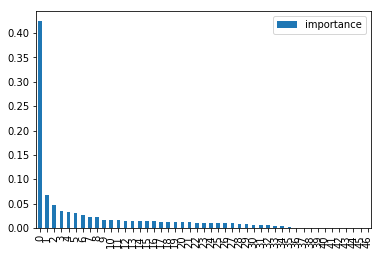

In [62]:
feature_importances.plot.bar()
plt.show()

# Gradient Boosting:

Another way to evaluate feature importance is through Gradient Boosting. I used the Gradient Boosting model and attempted to graph out a feature importance table like above. 



In [63]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [64]:
params = {'n_estimators': 500, 
         'max_depth': 2, 
         'loss': 'ls'}

gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)
predict_train = gbr.predict(X_train)
predict_test = gbr.predict(X_test)
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins = True)

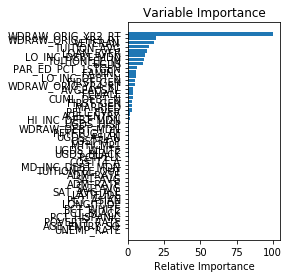

In [65]:
from matplotlib.pyplot import figure 
feature_importance = gbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# KNN Regressor:

I also tried KNN Regressor to use a variety of different models. One reason, KNN might not perform well here might be due to some of the features being correlated (Tuition In State is going to be related to Tuition Average). Last year's drop out rate is going to correlated to the target so, my expectation was that the performance for this model might be a bit lower. 

KNN Score was 63% for training set and 61% for test set. After conducting a GridSearch, this was increased to 65%. 

In [66]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.6894808484316884
0.6641258561148892


In [67]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': [1, 10, 20, 30, 40, 50, 60, 100], #optimal set of parameters in the internal range of parameters
               'weights': ['distance', 'uniform']}]
grid_search = GridSearchCV(estimator = knn, 
                          param_grid = parameters, 
                          scoring = 'explained_variance',
                          cv = 5,
                          n_jobs = -1)
%time grid_search = grid_search.fit(X_train, y_train)




CPU times: user 412 ms, sys: 31.1 ms, total: 443 ms
Wall time: 29.2 s


In [68]:
print(grid_search.best_params_)

{'n_neighbors': 20, 'weights': 'distance'}


In [69]:
print(grid_search.score(X_train, y_train))

0.9875288430977094


In [70]:
print(grid_search.score(X_test, y_test))

0.6678476789573888


# Cross Validation with KNN: 

Cross validation seems to suggest that the model is overfiting due to the variance between results (0.37 -> 0.58) 

In [71]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train, y_train, cv=5)
print(score)

[0.62602261 0.62453672 0.60140047 0.59764015 0.5960075 ]


# Lasso Regression: 

I also attempted Lasso just to try to see how it would perform. It performed fairly poorly compared to other models above.

One reason might be because there are various features and many of these features are influencing the model. 

I got 31% R2 for training set / 32% for test set. 


In [72]:
lass = linear_model.Lasso(alpha = 0.35)
lass.fit(X_train, y_train)
print(lass.score(X_train, y_train))
print(lass.score(X_test, y_test))

0.30196888352776496
0.3260677960909386


In [73]:
from sklearn.model_selection import GridSearchCV
parameters = [{'alpha': [0.10, 0.30, 0.60, 0.90, 1, 5, 10]}]
grid_search = GridSearchCV(estimator = lass, 
                          param_grid = parameters, 
                          scoring = 'explained_variance',
                          cv = 5,
                          n_jobs = -1)
%time grid_search = grid_search.fit(X_train, y_train)





CPU times: user 529 ms, sys: 50 ms, total: 579 ms
Wall time: 5.25 s


In [74]:
grid_search.best_params_

{'alpha': 0.1}

In [75]:
print(grid_search.score(X_train, y_train))
print(grid_search.score(X_test, y_test))

0.33826015394434394
0.3701859209136884


In [76]:
from sklearn.model_selection import GridSearchCV
parameters = [{'alpha': [10, 20, 30, 40, 50, 60, 80, 100]}]
grid_search = GridSearchCV(estimator = lass, 
                          param_grid = parameters, 
                          scoring = 'explained_variance',
                          cv = 5,
                          n_jobs = -1)
%time grid_search = grid_search.fit(X_train, y_train)
print(grid_search.score(X_train, y_train))
print(grid_search.score(X_test, y_test))
print(grid_search.best_params_)



CPU times: user 440 ms, sys: 42.3 ms, total: 482 ms
Wall time: 2.02 s
0.2630146497323367
0.27218091324062943
{'alpha': 10}


In [77]:
from sklearn.model_selection import GridSearchCV
parameters = [{'alpha': [100, 200, 300, 400, 500, 600]}]
grid_search = GridSearchCV(estimator = lass, 
                          param_grid = parameters, 
                          scoring = 'explained_variance',
                          cv = 5,
                          n_jobs = -1)
%time grid_search = grid_search.fit(X_train, y_train)
print(grid_search.score(X_train, y_train))
print(grid_search.score(X_test, y_test))
print(grid_search.best_params_)




CPU times: user 129 ms, sys: 29 ms, total: 158 ms
Wall time: 280 ms
0.16107021313827508
0.15864183637407858
{'alpha': 100}


# Stakeholder 2: Student Analysis


Here we will look at the problem from the prespective of the students. Here, we're assuming the students are only interested in the drop out rates. 

To do this, I will find historical data on drop out rates by going back to each dataset and labelling the drop out columns by the cohort year. 

Then, I will use the latest drop out rates we have (year is 2015 - actually referring to data from 2013 - 2014 cohort) and use that to predict future drop out rates. 


In [78]:
# df_comb = pd.concat([df_2012, df_2013, df_2014, df_2015], ignore_index=True)

# Data Cleaning:

Some datasets had "UNITID" as the index and some did not. I made sure all datasets looked similar in formatting first by reseting index and then I set index to "UNITID" to make sure the dataset was combined by each institution.

I then added withdraw rates from each year's dataset to a new dataset for that respective year. 

I remained columns for each withdraw rates for each dataset by the respective year. Year of the columns were retracted from College Scorecard's Data Dictionary. 


In [79]:
df_2012.reset_index(level = 0, inplace = True)

In [80]:
df_2014.reset_index(level = 0, inplace = True)

In [81]:
df_2012 = df_2012.set_index('UNITID')

In [82]:
df_2013 = df_2013.set_index('UNITID')
df_2014 = df_2014.set_index('UNITID')
df_2015 = df_2015.set_index('UNITID')

In [83]:
df_2012_new = df_2012[['WDRAW_ORIG_YR2_RT', 'WDRAW_ORIG_YR3_RT', 'WDRAW_ORIG_YR4_RT', 'WDRAW_ORIG_YR6_RT', 'WDRAW_ORIG_YR8_RT']]
df_2013_new = df_2013[['WDRAW_ORIG_YR2_RT', 'WDRAW_ORIG_YR3_RT', 'WDRAW_ORIG_YR4_RT', 'WDRAW_ORIG_YR6_RT', 'WDRAW_ORIG_YR8_RT']]
df_2014_new = df_2014[['WDRAW_ORIG_YR2_RT', 'WDRAW_ORIG_YR3_RT', 'WDRAW_ORIG_YR4_RT', 'WDRAW_ORIG_YR6_RT', 'WDRAW_ORIG_YR8_RT']]
df_2015_new = df_2015[['WDRAW_ORIG_YR2_RT', 'WDRAW_ORIG_YR3_RT', 'WDRAW_ORIG_YR4_RT', 'WDRAW_ORIG_YR6_RT', 'WDRAW_ORIG_YR8_RT']]

In [84]:
df_2012_new = df_2012_new.rename(columns={'WDRAW_ORIG_YR2_RT': '2010-2011', 'WDRAW_ORIG_YR3_RT': '2009-2010', 'WDRAW_ORIG_YR4_RT': '2008-2009', 'WDRAW_ORIG_YR6_RT': '2006-2007', 'WDRAW_ORIG_YR8_RT': '2004-2005'})
df_2013_new = df_2013_new.rename(columns={'WDRAW_ORIG_YR2_RT': '2011-2012', 'WDRAW_ORIG_YR3_RT': '2010-2011', 'WDRAW_ORIG_YR4_RT': '2009-2010', 'WDRAW_ORIG_YR6_RT': '2008-2009', 'WDRAW_ORIG_YR8_RT': '2005-2006'})
df_2014_new = df_2014_new.rename(columns={'WDRAW_ORIG_YR2_RT': '2012-2013', 'WDRAW_ORIG_YR3_RT': '2011-2012', 'WDRAW_ORIG_YR4_RT': '2010-2011', 'WDRAW_ORIG_YR6_RT': '2009-2010', 'WDRAW_ORIG_YR8_RT': '2007-2008'})
df_2015_new = df_2015_new.rename(columns={'WDRAW_ORIG_YR2_RT': '2013-2014', 'WDRAW_ORIG_YR3_RT': '2012-2013', 'WDRAW_ORIG_YR4_RT': '2011-2012', 'WDRAW_ORIG_YR6_RT': '2009-2010', 'WDRAW_ORIG_YR8_RT': '2008-2009'})

In [85]:
df_2012_new.reset_index(level = 0, inplace = True)
df_2013_new.reset_index(level = 0, inplace = True)
df_2014_new.reset_index(level = 0, inplace = True)
df_2015_new.reset_index(level = 0, inplace = True)

In [86]:
df_2012_new.head()

,UNITID,2010-2011,2009-2010,2008-2009,2006-2007,2004-2005
0,100654,0.248126,0.22513922,0.227888,0.247021446,0.224550898
1,100663,0.207568,0.201495638,0.185837,0.172972973,0.182857143
2,100690,0.416185,0.502994012,0.384106,0.235294118,0.365517241
3,100706,0.190311,0.189720333,0.148833,0.152606635,0.175024582
4,100724,0.322058,0.283642691,0.256149,0.301106581,0.261507672


In [87]:
df_2013_new.head()

,UNITID,2011-2012,2010-2011,2009-2010,2008-2009,2005-2006
0,100654,0.295308188,0.242878561,0.225934765,0.224028907,0.243328101
1,100663,0.24500196,0.225936811,0.222268384,0.185408922,0.172148654
2,100690,0.455882353,0.416184971,0.443113773,0.304597701,0.299465241
3,100706,0.208614865,0.192906574,0.184429327,0.135036496,0.148878924
4,100724,0.334172436,0.303030303,0.269141531,0.25491297,0.26179402


In [88]:
df_2014_new.head()

,UNITID,2012-2013,2011-2012,2010-2011,2009-2010,2007-2008
0,100654,0.318108974,0.27874885,0.256371814,0.225498008,0.237490072
1,100663,0.259811047,0.234025872,0.214548126,0.183460076,0.162612613
2,100690,0.633187773,0.411764706,0.398843931,0.298013245,0.223529412
3,100706,0.215600351,0.232263514,0.190311419,0.137570394,0.147867299
4,100724,0.305031447,0.310887351,0.290345314,0.233353329,0.268491555


In [89]:
df_2015_new.head()

,UNITID,2013-2014,2012-2013,2011-2012,2009-2010,2008-2009
0,100654,0.308313156,0.294871795,0.27598896,0.22513922,0.198735321
1,100663,0.224177506,0.238008721,0.216385731,0.198171998,0.170539034
2,100690,0.587064677,0.593886463,0.392156863,0.431137725,0.25862069
3,100706,0.218584071,0.191936898,0.20777027,0.152683296,0.130474453
4,100724,0.292065279,0.310272537,0.312146004,0.251160093,0.228523302


# Combination of Datasets and Further Cleaning:

After I matched each dataest, I combined them together with concat. 

I also filled in NaN's with 0's and replaced PrivacySuppressed with 0's as well. 

I then converted values to numeric (as floats) for each columns. 

In the end, the combined dataset had 10 cohort years data. 

The target had one cohort year's data. 

In [90]:
df_comb_new = pd.concat([df_2012_new,df_2013_new, df_2014_new, df_2015_new], axis=0, ignore_index=True)

In [91]:
df_comb_new = df_comb_new.fillna(0)
df_comb_new = df_comb_new.replace(['PrivacySuppressed'], [0])
df_comb_new = df_comb_new.astype(float)
df_comb_new = df_comb_new.apply(pd.to_numeric)

In [92]:
df_comb_new.head()

,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,UNITID
0,0.224551,0.0,0.247021,0.0,0.227888,0.225139,0.248126,0.0,0.0,0.0,100654.0
1,0.182857,0.0,0.172973,0.0,0.185837,0.201496,0.207568,0.0,0.0,0.0,100663.0
2,0.365517,0.0,0.235294,0.0,0.384106,0.502994,0.416185,0.0,0.0,0.0,100690.0
3,0.175025,0.0,0.152607,0.0,0.148833,0.189720,0.190311,0.0,0.0,0.0,100706.0
4,0.261508,0.0,0.301107,0.0,0.256149,0.283643,0.322058,0.0,0.0,0.0,100724.0


In [93]:
df_comb_new.shape

(30893, 11)

# Data Visualization: 

As there is not much difference in the features in this dataset, I just used a simple histogram.

Here we can see that drop out rates were fairly low until 2008 - 2009 year. As we are looking at U.S. Colleges / Universities - we can guess that one of the cause of this might be the financial crisis. The same pattern followed in the academic year of 2009-2010. 

Similarly, the most recent year's data appear to be hopeful with less dropouts than previous years. 

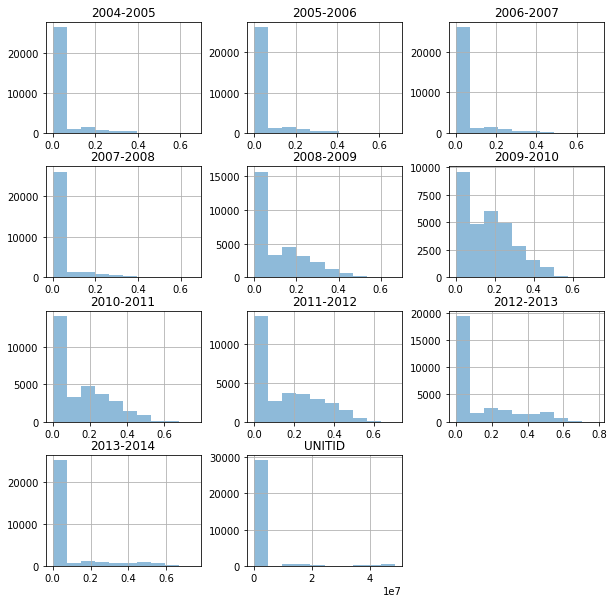

In [94]:
df_comb_new.hist(alpha = 0.5, figsize = (10,10))
plt.show()

### Comparing between the years. 

The data appears to be fairly consistent among the years when I plotted various academic years amongst each other.

True


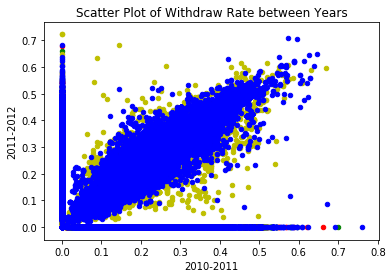

In [95]:
ax1 = df_comb_new.plot(kind='scatter', x='2004-2005', y='2005-2006', color='r', title = 'Scatter Plot of Withdraw Rate between Years', legend = False)    
ax2 = df_comb_new.plot(kind='scatter', x='2006-2007', y='2007-2008', color='g', ax=ax1)    
ax3 = df_comb_new.plot(kind='scatter', x='2008-2009', y='2009-2010', color='y', ax=ax1)
ax4 = df_comb_new.plot(kind= 'scatter', x='2010-2011', y='2011-2012', color='b', legend = False,  ax=ax1)
print(ax1 == ax2 == ax3 == ax4)


# Model Selection / Processes:

I used the same exact process as above. In this case, the features were already picked out (previous years) and the target was the most recent drop out rates. 

I followed the same approach as above and picked models that best fit regression problems as above. 

I also tried a few different models to just see how they would perform.

# Train Test Split:

I used sklearn's train test split to divide the data. I used the same division as above 80% training set and 20% test set. 

In [96]:
from sklearn.model_selection import train_test_split
data_wdraw = df_comb_new.loc[:,df_comb_new.columns != '2013-2014']
target_wdraw = df_comb_new['2013-2014']
X_train, X_test, y_train, y_test = train_test_split(data_wdraw, target_wdraw, test_size=0.20) 
print(X_train.shape)
print(df_comb_new.shape)

(24714, 10)
(30893, 11)


# Ridge Regression with GridSearch: 

I first did the Ridge Regression with GridSearch. 

The R2 after performing GridSearch for the test set was 82.5%. 

In [97]:
from sklearn.linear_model import LogisticRegression
ridgeregr = linear_model.Ridge()
ridgeregr.fit(X_train, y_train)
print(ridgeregr.score(X_test, y_test))
print(ridgeregr.score(X_train, y_train))

0.7839585949101604
0.8069664751091195


In [98]:
from sklearn.model_selection import GridSearchCV
ridgeregr = linear_model.Ridge()
parameters = [{'alpha': [1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = ridgeregr, 
                          param_grid = parameters,
                          scoring = 'explained_variance',
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.score(X_test, y_test))
%time grid_search = grid_search.fit(X_train, y_train)


0.7840684169810959
CPU times: user 65 ms, sys: 43.3 ms, total: 108 ms
Wall time: 158 ms


In [99]:
from sklearn.model_selection import GridSearchCV
ridgeregr = linear_model.Ridge()
parameters = [{'alpha': [200, 500, 700, 900, 1000, 1200, 1500]}]
grid_search = GridSearchCV(estimator = ridgeregr, 
                          param_grid = parameters,
                          scoring = 'explained_variance',
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.score(X_test, y_test))
%time grid_search = grid_search.fit(X_train, y_train)






0.7038665203102177
CPU times: user 76.5 ms, sys: 43.3 ms, total: 120 ms
Wall time: 206 ms


## Cross Val for Ridge Regression: 

I also did a cross validation for GridSearch. I did a 10 fold validation but, for some reason, there were only 3 results. The results were fairly consistent among each other.

In [100]:
from sklearn.model_selection import cross_val_score
cross_val_score(ridgeregr, data_wdraw, target_wdraw, cv=10)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.79045905, 0.68723179, 0.73021667])

# Random Forest Regressor:

Second, I did a Random Forest Regressor. I did this because it can be used for evaluating feature importances. 

Is there a particular year that impacts the next year's drop out rate? Possibly the year before? 2 years before? 

The score of the model was 93% for the test set after doing GridSearch

In [101]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
ypred = model.predict(X_test)

0.9772525605848585
0.8821315071874829


In [102]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, data_wdraw, target_wdraw, cv=10)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.83843338, 0.79443838, 0.59607576])

In [103]:
predictions = model.predict(X_test)

In [104]:
predictions

array([0.25652492, 0.        , 0.35107842, ..., 0.        , 0.        ,
       0.        ])

In [105]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [1, 10, 100], #optimal set of parameters in the internal range of parameters
               'max_depth': [1, 10, 100]}]
grid_search = GridSearchCV(estimator = model, 
                          param_grid = parameters, 
                          scoring = 'explained_variance',
                          cv = 5,
                          n_jobs = -1)
%time grid_search = grid_search.fit(X_train, y_train)




CPU times: user 3.73 s, sys: 60.7 ms, total: 3.79 s
Wall time: 30.8 s


In [106]:
print(grid_search.best_params_)
print(grid_search.score(X_test, y_test))



{'max_depth': 10, 'n_estimators': 100}
0.8951418457782272


# Feature Importance:

The most important indicator of future drop out rates appears to be 1 academic year before the one you were predicting.

This makes sense in terms of future prediction. There is also a large importance in the academic year 2008 - 2009 (year of financial crisis) which may have played a factor.

In [107]:
feature_importances = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending = False)

In [108]:
feature_importances

,importance
2012-2013,0.437050
2008-2009,0.274049
2010-2011,0.215359
UNITID,0.024140
2009-2010,0.023928
2011-2012,0.023468
2007-2008,0.001906
2006-2007,0.000070
2004-2005,0.000021
2005-2006,0.000008


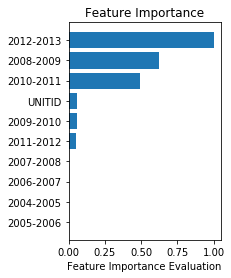

In [109]:
feature_importance = model.feature_importances_
feature_importance = (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Feature Importance Evaluation')
plt.title('Feature Importance')
plt.show()

# KNN Regressor: 

I tried KNN just to try to see what would happen. It did not perform well. My best guess is because features are highly correlated to each other and the target and KNN assumes each feature is independent of each other.

In [110]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.12021582439971812
-0.07590501235893687


In [111]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': [1, 10, 20, 30, 40, 50, 60, 100], #optimal set of parameters in the internal range of parameters
               'weights': ['distance', 'uniform']}]
grid_search = GridSearchCV(estimator = knn, 
                          param_grid = parameters, 
                          scoring = 'explained_variance',
                          cv = 5,
                          n_jobs = -1)
%time grid_search = grid_search.fit(X_train, y_train)

CPU times: user 494 ms, sys: 134 ms, total: 629 ms
Wall time: 12.2 s


In [112]:
print(grid_search.score(X_test, y_test))

0.0076283065925941695


# SVR 

I also tried SVR as I wanted to see how it would perform. It performed really poorly. 

In [113]:
#from sklearn.svm import SVR
#svr = SVR(kernel = 'linear')
#svr.fit(X_train, y_train)

In [114]:
#print(svr.score(X_train, y_train))

In [115]:
#print(svr.score(X_test, y_test))

In [116]:
# svr.predict(X_test)

# Keras Modeling

- activation function
- train /test split needed (validation set)
- batch size

In [117]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units = 10, input_dim = 10))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae', 'mse'])
    
    return regressor

Using TensorFlow backend.


In [118]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn = build_regressor, batch_size = 32, epochs = 100)

In [119]:
results = regressor.fit(X_train, y_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
24714/24714 [==============================] - 1s 46us/step - loss: 1290838733.2297 - mean_absolute_error: 1620.5018 - mean_squared_error: 1290838733.2297
Epoch 2/100
24714/24714 [==============================] - 1s 38us/step - loss: 0.0274 - mean_absolute_error: 0.1246 - mean_squared_error: 0.0274 0s - loss: 0.0277 - mean_absolute_error: 0.1251 - mean_squared_error
Epoch 3/100
24714/24714 [==============================] - 1s 37us/step - loss: 0.0282 - mean_absolute_error: 0.1254 - mean_squared_error: 0.0282 0s - loss: 0.0274 - mean_absolute_error: 0.1245 - mean_squared_err
Epoch 4/100
24714/24714 [==============================] - 1s 36us/step - loss: 0.0451 - mean_absolute_error: 0.1330 - mean_squared_error: 0.0451
Epoch 5/100
24714/24714 [==============================] - 1s 36us/step - loss: 57469738.7252 - mean_absolute_error: 612.1969 - mean_square

24714/24714 [==============================] - 1s 39us/step - loss: 1.3816 - mean_absolute_error: 0.2885 - mean_squared_error: 1.3816 0s - loss: 0.2692 - mean_absolute_error: 0.2455 - mean_squared_error: 0.
Epoch 44/100
24714/24714 [==============================] - 1s 33us/step - loss: 347197371.9550 - mean_absolute_error: 1356.9559 - mean_squared_error: 347197371.9550
Epoch 45/100
24714/24714 [==============================] - 1s 32us/step - loss: 0.0789 - mean_absolute_error: 0.2562 - mean_squared_error: 0.0789
Epoch 46/100
24714/24714 [==============================] - 1s 32us/step - loss: 0.0793 - mean_absolute_error: 0.2563 - mean_squared_error: 0.0793
Epoch 47/100
24714/24714 [==============================] - 1s 32us/step - loss: 817.5503 - mean_absolute_error: 2.4557 - mean_squared_error: 817.5503
Epoch 48/100
24714/24714 [==============================] - 1s 33us/step - loss: 61580101.8445 - mean_absolute_error: 979.1594 - mean_squared_error: 61580101.8445
Epoch 49/100
24714/

24714/24714 [==============================] - 1s 43us/step - loss: 1779.5311 - mean_absolute_error: 3.5310 - mean_squared_error: 1779.5311
Epoch 93/100
24714/24714 [==============================] - 1s 42us/step - loss: 4484953.4358 - mean_absolute_error: 212.7005 - mean_squared_error: 4484953.4358
Epoch 94/100
24714/24714 [==============================] - 1s 36us/step - loss: 193680681.8830 - mean_absolute_error: 1097.4368 - mean_squared_error: 193680681.8830
Epoch 95/100
24714/24714 [==============================] - 1s 38us/step - loss: 17852.6234 - mean_absolute_error: 10.7396 - mean_squared_error: 17852.6234
Epoch 96/100
24714/24714 [==============================] - 1s 36us/step - loss: 0.2398 - mean_absolute_error: 0.4497 - mean_squared_error: 0.2398
Epoch 97/100
24714/24714 [==============================] - 2s 72us/step - loss: 3915607.7191 - mean_absolute_error: 144.9901 - mean_squared_error: 3915607.7191
Epoch 98/100
24714/24714 [==============================] - 1s 40us/s

In [120]:
y_pred = regressor.predict(X_test)

In [121]:
y_test.shape

(6179,)

In [122]:
y_pred.shape

(6179,)

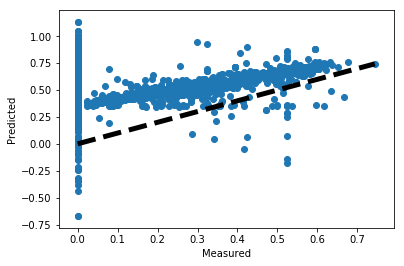

In [123]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 5)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Using school characteristics as predictor for withdrawl rate:

Another way to predict withdrawal rate is by using various characteristics for schools such as regions for their location, tuition rates, admissions rates and others. These characteristics can be used to evaluate what areas in school's control results in higher withdrawal rate. 

The way I did this was to take features that would impact withdrawal rate and then use that to see what feature that students should look out for the most in choosing schools (schools in certain locations maybe or schools with certain tuition etc). 

For this, I only used date from one year (2014). 


In [125]:
df_2014.head()

,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df_2014 = df_2014.reset_index('UNITID')

In [127]:
df_school = df_2014[['UNITID', 'PREDDEG', 'CONTROL', 'REGION', 'LOCALE', 'HBCU', 'HSI', 'MENONLY', 'WOMENONLY', 'ADM_RATE', 'SAT_AVG', 'DISTANCEONLY', 'UG', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PFTFAC', 'PCTPELL', 'AVGFACSAL', 'WDRAW_ORIG_YR2_RT']]

In [128]:
df_school.head()

,UNITID,PREDDEG,CONTROL,REGION,LOCALE,HBCU,HSI,MENONLY,WOMENONLY,ADM_RATE,...,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,TUITIONFEE_IN,TUITIONFEE_OUT,PFTFAC,PCTPELL,AVGFACSAL,WDRAW_ORIG_YR2_RT
0,100654,3,1,5,NaN,NaN,NaN,NaN,NaN,0.5256,...,0.0333,0.9353,0.0055,0.0019,9096.0,16596.0,0.8967,0.7356,6892.0,0.318108974
1,100663,3,1,5,NaN,NaN,NaN,NaN,NaN,0.8569,...,0.5922,0.2600,0.0283,0.0518,7510.0,17062.0,0.9072,0.3460,9957.0,0.259811047
2,100690,3,2,5,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2990,0.4192,0.0069,0.0034,6900.0,6900.0,0.6000,0.6801,3430.0,0.633187773
3,100706,3,1,5,NaN,NaN,NaN,NaN,NaN,0.8203,...,0.6988,0.1255,0.0382,0.0376,9158.0,21232.0,0.6221,0.3072,9302.0,0.215600351
4,100724,3,1,5,NaN,NaN,NaN,NaN,NaN,0.5326,...,0.0158,0.9208,0.0121,0.0019,8720.0,15656.0,0.6539,0.7347,6609.0,0.305031447


# Data Cleaning:

Similar to methods above, I cleaned my data using the same methods as above. Replaced NaNs, and Privacy Suppressed variables. I also converted everything to a float for a better analysis. 

In [129]:
df_school.dtypes

UNITID                 int64
PREDDEG                int64
CONTROL                int64
REGION                 int64
LOCALE               float64
HBCU                 float64
HSI                  float64
MENONLY              float64
WOMENONLY            float64
ADM_RATE             float64
SAT_AVG              float64
DISTANCEONLY         float64
UG                   float64
UGDS_WHITE           float64
UGDS_BLACK           float64
UGDS_HISP            float64
UGDS_ASIAN           float64
TUITIONFEE_IN        float64
TUITIONFEE_OUT       float64
PFTFAC               float64
PCTPELL              float64
AVGFACSAL            float64
WDRAW_ORIG_YR2_RT     object
dtype: object

In [130]:
df_school = df_school.fillna(0)
df_school['WDRAW_ORIG_YR2_RT'] = df_school['WDRAW_ORIG_YR2_RT'].replace(['PrivacySuppressed'], [0])

In [131]:
df_school['UNITID'] = df_school['UNITID'].astype(float)
df_school['PREDDEG'] = df_school['PREDDEG'].astype(float)
df_school['CONTROL'] = df_school['CONTROL'].astype(float)
df_school['REGION'] = df_school['REGION'].astype(float)
df_school['WDRAW_ORIG_YR2_RT'] = df_school['WDRAW_ORIG_YR2_RT'].astype(float)

In [132]:
df_school.head()

,UNITID,PREDDEG,CONTROL,REGION,LOCALE,HBCU,HSI,MENONLY,WOMENONLY,ADM_RATE,...,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,TUITIONFEE_IN,TUITIONFEE_OUT,PFTFAC,PCTPELL,AVGFACSAL,WDRAW_ORIG_YR2_RT
0,100654.0,3.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.5256,...,0.0333,0.9353,0.0055,0.0019,9096.0,16596.0,0.8967,0.7356,6892.0,0.318109
1,100663.0,3.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.8569,...,0.5922,0.2600,0.0283,0.0518,7510.0,17062.0,0.9072,0.3460,9957.0,0.259811
2,100690.0,3.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.2990,0.4192,0.0069,0.0034,6900.0,6900.0,0.6000,0.6801,3430.0,0.633188
3,100706.0,3.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.8203,...,0.6988,0.1255,0.0382,0.0376,9158.0,21232.0,0.6221,0.3072,9302.0,0.215600
4,100724.0,3.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.5326,...,0.0158,0.9208,0.0121,0.0019,8720.0,15656.0,0.6539,0.7347,6609.0,0.305031


In [133]:
df_school.dtypes

UNITID               float64
PREDDEG              float64
CONTROL              float64
REGION               float64
LOCALE               float64
HBCU                 float64
HSI                  float64
MENONLY              float64
WOMENONLY            float64
ADM_RATE             float64
SAT_AVG              float64
DISTANCEONLY         float64
UG                   float64
UGDS_WHITE           float64
UGDS_BLACK           float64
UGDS_HISP            float64
UGDS_ASIAN           float64
TUITIONFEE_IN        float64
TUITIONFEE_OUT       float64
PFTFAC               float64
PCTPELL              float64
AVGFACSAL            float64
WDRAW_ORIG_YR2_RT    float64
dtype: object

# Data Visualization: 

Here I am looking at a few factors to see if their relationship with withdrawal rate. Some of the variables were not as I expected them to be. I thought there would be a correlation between withdrawl date being lower when admission rates were lower (thinking schools that have lower admission rates are more competitive hence people do not drop out) but, the relationship was opposite which I thought was interesting.

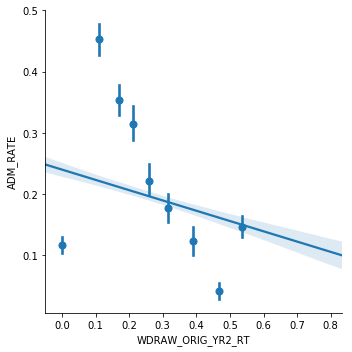

In [134]:
sns.lmplot(x = 'WDRAW_ORIG_YR2_RT', y = 'ADM_RATE', data = df_school, fit_reg = True, x_bins = 10)
plt.show()

Next, I looked at relationship between average faculty salary and withdrawal rates. I also found this to be not as expected. I thought that withdraw rate would decrease as salary increased but, there is a positive correlation between salary increase in staff and higher withdraw rates. 


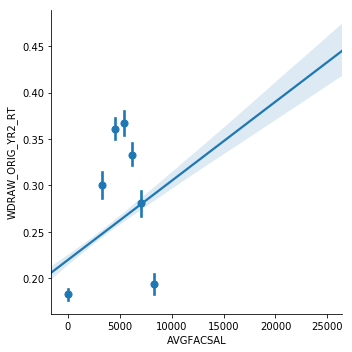

In [135]:
sns.lmplot(x = 'AVGFACSAL', y = 'WDRAW_ORIG_YR2_RT', data = df_school, fit_reg = True, x_bins = 10)
plt.show()

### Region with the highest withdrawal rates:

The region with the highest withdraw rate is the Southeast Region of the United States. This makes sense as these states contain some states which are ranked as least educated (Alabama, Mississipi, Kentucky, Tennesse) 

Source: https://www.cnbc.com/2018/01/23/the-10-most-and-least-educated-states-in-2018.html

1	New England (CT, ME, MA, NH, RI, VT)	
2	Mid East (DE, DC, MD, NJ, NY, PA)	
3	Great Lakes (IL, IN, MI, OH, WI)	
4	Plains (IA, KS, MN, MO, NE, ND, SD)	
5	Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)	
6	Southwest (AZ, NM, OK, TX)	
7	Rocky Mountains (CO, ID, MT, UT, WY)	
8	Far West (AK, CA, HI, NV, OR, WA)	
9	Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)

The lowest withdrawal rates comes from the New England States. This also makes sense as Massachussets is ranked as one of the most educated states and contains various highly ranked schools. 

It appears that schools in the East Coast (New Englad and Mid East) schools have lower withdraw rates and schools that are in the Southeast / South West regions have high withdraw rates. 

This can also correlate to the incomes around the American South. 

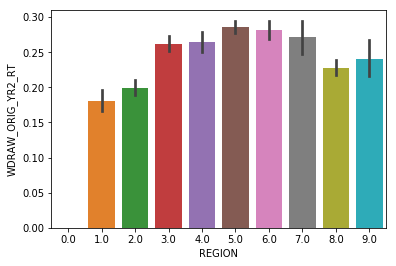

In [136]:
sns.barplot(x = 'REGION', y = 'WDRAW_ORIG_YR2_RT', data = df_school)
plt.show()

### Types of institutions and withdraw rates. 

It appears that institutions that have high withdraw rates are Public institutions. 

The second appears to be Private For-Profit instituitions. 

Public institutions may have higher withdraw rates due to the higher number of students attending these institutions and also on the basis that it most likely admits more students from low income families (which may be more at risk to withdraw due to financial responsibilities) 

- 1	Public
- 2	Private nonprofit
- 3	Private for-profit

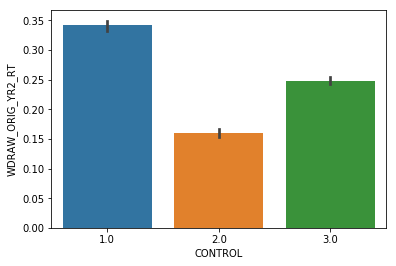

In [137]:
sns.barplot(x = 'CONTROL', y = 'WDRAW_ORIG_YR2_RT', data = df_school)
plt.show()

### Does distance matter?

With the rise of online education and its flexibility - people might get the assumption that online education will reduce withdraw rates but, it looks like institutions that offer online only education tend to have a higher withdraw rates than those with face to face classes. 

This goes to show that there may need more research before schools switch to distance only classes and distance only schools need to evaluate what is causing students to withdraw.

- 1 Distance Only 
- 0 Face to face (Non-distance) 

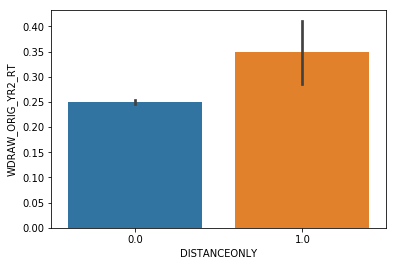

In [138]:
sns.barplot(x = 'DISTANCEONLY', y = 'WDRAW_ORIG_YR2_RT', data = df_school)
plt.show()

# Test Train Split:

Similar to above, I did a train test split. The test size being 20% and the rest being train. 

There are 22 features (excluding the target which is the most recent Withdraw rate).

In [139]:
from sklearn.model_selection import train_test_split
data = df_school.loc[:,df_school.columns != 'WDRAW_ORIG_YR2_RT']
target = df_school['WDRAW_ORIG_YR2_RT']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20) 
print(X_train.shape)
print(df_school.shape)

(6162, 22)
(7703, 23)


In [140]:
X_train.head()

,UNITID,PREDDEG,CONTROL,REGION,LOCALE,HBCU,HSI,MENONLY,WOMENONLY,ADM_RATE,...,UG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,TUITIONFEE_IN,TUITIONFEE_OUT,PFTFAC,PCTPELL,AVGFACSAL
2713,198756.0,3.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.4225,...,0.0,0.0036,0.7345,0.0618,0.0007,18236.0,18236.0,0.6236,0.6647,6127.0
1421,156903.0,2.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.6596,0.2340,0.0000,0.0000,17000.0,17000.0,0.0000,0.8721,3562.0
3001,206011.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.8303,0.0422,0.0908,0.0040,4442.0,6976.0,0.2094,0.4365,6154.0
4307,246789.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.3030,0.0606,0.1212,0.0909,24500.0,24500.0,0.0000,0.0000,5532.0
6709,466523.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.3580,0.1605,0.3951,0.0000,0.0,0.0,0.0000,0.8584,0.0


In [141]:
X_test.head()

,UNITID,PREDDEG,CONTROL,REGION,LOCALE,HBCU,HSI,MENONLY,WOMENONLY,ADM_RATE,...,UG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,TUITIONFEE_IN,TUITIONFEE_OUT,PFTFAC,PCTPELL,AVGFACSAL
2013,176770.0,3.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.5455,...,0.0,0.9409,0.0108,0.0215,0.0108,10150.0,10150.0,0.7789,0.4760,6503.0
894,139384.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.7815,0.1017,0.0870,0.0067,2674.0,4810.0,0.0000,0.6639,4627.0
5483,442620.0,1.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.5556,0.0180,0.1502,0.0270,0.0,0.0,0.0000,0.6161,0.0
6095,453482.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.4750,0.2250,0.0125,0.0000,11550.0,11550.0,0.0000,0.7805,3574.0
3694,225201.0,2.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.2914,0.1002,0.5268,0.0291,0.0,0.0,1.0000,0.6072,4849.0


# Model Selection and Results:

I used the models similar to above. I used the Ridge Regression as a good baseline. I then used Random Forest to see the most important feature. Both of these models were done by GridSearch to select the best parameters. 

# Ridge Regression: 

The first model I did was Ridge Regression. The model performed poorly compared to previous two models with a score of 27% for the Test and 31% for the train. 

I also do a Gridsearch and the results were similar to the default parameters. 

In [142]:
from sklearn.linear_model import LogisticRegression
ridgeregr = linear_model.Ridge()
ridgeregr.fit(X_train, y_train)
print(ridgeregr.score(X_test, y_test))
print(ridgeregr.score(X_train, y_train))

0.28971482381555
0.3136740508470729


In [143]:
from sklearn.model_selection import GridSearchCV
ridgeregr = linear_model.Ridge()
parameters = [{'alpha': [1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = ridgeregr, 
                          param_grid = parameters,
                          scoring = 'explained_variance',
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.score(X_test, y_test))
%time grid_search = grid_search.fit(X_train, y_train)

0.28972358729341763
CPU times: user 55.2 ms, sys: 33.7 ms, total: 88.9 ms
Wall time: 111 ms


## Cross-Validation with Ridge Regression: 

Here, I did a Cross Validation which shows that most of the scores are consistent (I did a 10 fold CV so, some of the scores twoards the end is a bit lower).

The scores are consistent so, I concluded that there wasn't large overfitting in the data. 

In [144]:
from sklearn.model_selection import cross_val_score
cross_val_score(ridgeregr, data, target, cv=10)

array([  0.34387814,   0.39631238,   0.41727474,   0.2758285 ,
         0.31656104,   0.28900301,   0.05057797,   0.20107521,
         0.31628847, -14.10061793])

# Random Forest:

Secondly, I did Random Forest as it performed the best in above models. From Random Forest, you can see that the train set performed really well and the test score performed similarly to models above with a 62.34%. 

After doing a GridSearch, the score went up to 65%. 

In [145]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
ypred = model.predict(X_test)

0.9361785955171104
0.6341740222787453


In [146]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, data, target, cv=10)

array([ 0.66238578,  0.66884667,  0.68535285,  0.63061751,  0.66670798,
        0.54048938,  0.54668929,  0.55409594,  0.55215123, -0.33174954])

In [147]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [1, 10, 100], #optimal set of parameters in the internal range of parameters
               'max_depth': [1, 10, 100]}]
grid_search = GridSearchCV(estimator = model, 
                          param_grid = parameters, 
                          scoring = 'explained_variance',
                          cv = 5,
                          n_jobs = -1)
%time grid_search = grid_search.fit(X_train, y_train)




CPU times: user 4.83 s, sys: 128 ms, total: 4.95 s
Wall time: 27 s


In [148]:
print(grid_search.best_params_)
print(grid_search.score(X_test, y_test))

{'max_depth': 100, 'n_estimators': 100}
0.6731872082092741


# Feature Importance using Random Forest:

Here, I looked at the most important features. Tuition In-State and Tuition Out of State were the most important features. This makes sense as a school's tuition will correlate to a student dropping out. If tuition is high, students may be more likely to drop out as not being able to afford attending the school. 

The other interesting features were Percentage of Students recieving the Pell Grant. 

In [149]:
feature_importances = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending = False)

In [150]:
feature_importances

,importance
TUITIONFEE_IN,0.274537
ADM_RATE,0.159581
UNITID,0.087229
PCTPELL,0.084981
UGDS_BLACK,0.068410
CONTROL,0.065533
UGDS_WHITE,0.052602
UGDS_HISP,0.040372
TUITIONFEE_OUT,0.038515
UGDS_ASIAN,0.034152


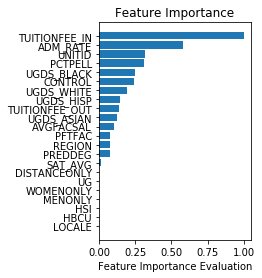

In [151]:
feature_importance = model.feature_importances_
feature_importance = (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Feature Importance Evaluation')
plt.title('Feature Importance')
plt.show()

# Limitations: 

This dataset is really large. It has over 1900+ features. It is impossible to get into everything and evaluate it properly in this project alone. It is also important to note that the dataset is only focused on U.S. colleges / universities so, it does not address any international schools. 

As there were so many features, it was difficult to do a PCA analysis and actually get helpful insights. Since I did have to manually select features I found to be interesting, this might not be reflective of actual dataset and there might be feature that is not included here. 

There are other factors that may be a cause for a student dropping out (pursuit of better opportunities, better job, military service, entrepeunership etc). It is important to have prespective and understand that withdraw might not always mean something negative. 

# Applications:

I find this project to be helpful for colleges / universities. The first modeling approaches shows universities areas that they can improve upon. They can use historical data to correctly predict future drop out rates. They can use these rates to provide services/ support to their students to aid in lowering future withdraw rates in general. 

For students, I find the last modeling approach to be the most helpful. They can see which regions have lower drop out rates (if I was a student, betting on a New England college would not be a bad bet). Similarly, students also need to factor in the tuition of the institution that they are attending. If these features are provided by the students, we can predict drop out rates for other institutions not included here as well. 


# Conclusion & Other Areas of Exploration: 

Overall, this is a very interesting problem to look at. There are various factors that leads to a student dropping out from a university. Understanding of these factors by both stakeholders, college and students, will lead to better implementation of programs and services that can prevent students from dropping out. 

An area of exploration apperas to be online / distance education. Distance education has a much larger drop out rate compared to traditional education method. As online education has increased over the years, will that prove to be true? How can distance only institutions better equip themselves so, students do not drop out? 

I think this is a great opportunity for online education & can provide valuable insights into changing the education landscape in the future. 